# Hyperparameter Tuning
- Grid Search
- Random Search

- https://scikit-learn.org/stable/modules/grid_search.html

__Applied on synthetic dataset__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 500, n_classes = 4,
                           n_features = 2, n_redundant = 0,
                           n_informative = 2, random_state = 40,
                           n_clusters_per_class = 1, flip_y = 0.1)


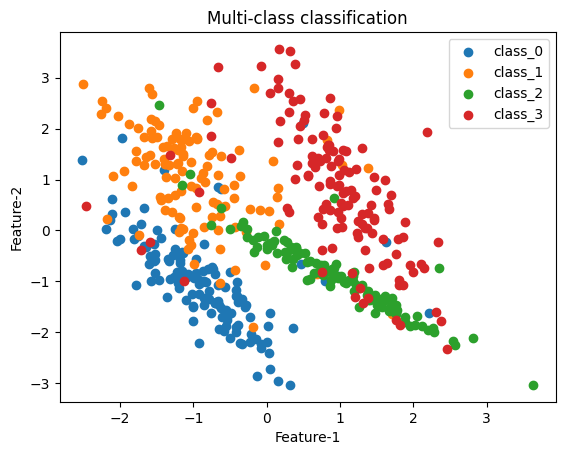

In [3]:
n_classes = 4

for i in range(n_classes):
  plt.scatter(X[y == i, 0], X[y == i, 1], label='class_'+str(i))

plt.legend()
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.title('Multi-class classification')

plt.show()

In [4]:
X = pd.DataFrame(data=X)
y = pd.Series(data=y)

In [5]:
X.head()

,0,1
0,-0.388147,-1.398145
1,1.015920,-0.931243
2,0.698227,1.429764
3,-0.191397,-1.889654
4,2.051380,-1.673968


In [6]:
y.head()

0    0
1    2
2    3
3    1
4    2
dtype: int64

In [7]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
0,500.0,0.003034,1.210394,-2.514223,-1.026603,-0.026485,0.981191,3.632995
1,500.0,-0.024994,1.345571,-3.032536,-1.019423,-0.218636,1.046513,3.563527


In [8]:
y.describe()

count    500.000000
mean       1.494000
std        1.142179
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        3.000000
dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

In [10]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')

X_train.shape: (400, 2)
y_train.shape: (400,)


In [11]:
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_test.shape: (100, 2)
y_test.shape: (100,)


### Using Logistic Regression
- Softmax

In [12]:
from sklearn.linear_model import LogisticRegression

softmax_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')

softmax_clf.fit(X_train, y_train)

score_softmax = softmax_clf.score(X_test, y_test)

print(f'score_softmax: {score_softmax} ')

score_softmax: 0.85 


In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)

X_test_std = sc.transform(X_test)

In [14]:
softmax_clf_std = LogisticRegression(multi_class='multinomial', solver='lbfgs')

softmax_clf_std.fit(X_train_std, y_train)

score_softmax_std = softmax_clf_std.score(X_test_std, y_test)

print(score_softmax_std)

0.85


### Support Vector Machine

In [15]:
from sklearn.svm import SVC

In [16]:
svc_clf = SVC(kernel='linear', C=1, random_state=42)

svc_clf.fit(X_train_std, y_train)
score_svc_linear = svc_clf.score(X_test_std, y_test)

print(score_svc_linear)

0.85


In [17]:
svc_clf_rbf = SVC(kernel='rbf',C=1, gamma=0.5, random_state=42)

svc_clf_rbf.fit(X_train_std, y_train)
score_svc_rbf = svc_clf_rbf.score(X_test_std, y_test)

print(score_svc_rbf)

0.85


In [18]:
svc_clf_rbf = SVC(kernel='rbf',C=4, gamma=0.4, random_state=42)

svc_clf_rbf.fit(X_train_std, y_train)
score_svc_rbf = svc_clf_rbf.score(X_test_std, y_test)

print(score_svc_rbf)

0.87


In [19]:
svc_clf_rbf = SVC(kernel='rbf',C=8, gamma=0.6, random_state=42)

svc_clf_rbf.fit(X_train_std, y_train)
score_svc_rbf = svc_clf_rbf.score(X_test_std, y_test)

print(score_svc_rbf)

0.88


In [20]:
y_pred = svc_clf_rbf.predict(X_test_std)
print(y_pred[:10])

[3 1 1 2 1 3 2 1 1 0]


In [21]:
print(y_test[:10].values)

[3 1 1 2 2 3 2 1 1 0]


Classification report for classifier SVC(C=8, gamma=0.6, random_state=42):
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.86      0.79      0.83        24
           2       0.81      0.91      0.86        23
           3       0.96      0.85      0.90        26

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100




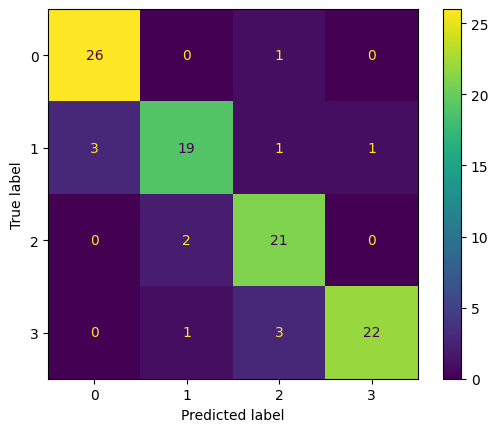

In [22]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("Classification report for classifier %s:\n%s\n"
      % (svc_clf_rbf, metrics.classification_report(y_test, y_pred)))

confMatrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)

disp.plot()
plt.show()

## Hyperparameter tuning for SVM

- Hyper-parameters are parameters that are not directly learnt within estimators.

- It is possible and recommended to search the hyper-parameter space for the best cross validation score.

**Grid Search**

In [23]:
# Base Estimator
hpt_svm_clf = SVC(kernel='rbf')

In [24]:
hpt_svm_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### We will focus on tuning the following hyperpaameters:
- `C`
- `gamma`


In [25]:
# Specify the parameter grid for tuning as list of dictionary

hpt_param_grid = [
    {
     'C':[i for i in range(1,10)],
     'gamma': np.linspace(0.1, 1, 10)
     }
     ]

In [26]:
hpt_param_grid

[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
  'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}]

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
grid_search = GridSearchCV(estimator = hpt_svm_clf,
                           param_grid = hpt_param_grid,
                           cv = 5)

In [29]:
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}])

In [30]:
print(grid_search.best_params_)

{'C': 2, 'gamma': 0.1}


In [31]:
print(grid_search.best_score_)

0.85


In [32]:
print(grid_search.best_estimator_)

SVC(C=2, gamma=0.1)


In [33]:
svc_clf_rbf = SVC(kernel='rbf',C=2, gamma=0.1, random_state=42)

svc_clf_rbf.fit(X_train_std, y_train)
score_svc_rbf = svc_clf_rbf.score(X_test_std, y_test)

print(score_svc_rbf)

0.86


In [34]:
CV_results = grid_search.cv_results_

In [35]:
for elem in CV_results:
    print(elem)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_C
param_gamma
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [36]:
for mean_score, std_score, rank_score in zip(
    CV_results['mean_test_score'], CV_results['std_test_score'], CV_results['rank_test_score']):
    print(mean_score, std_score, rank_score)

0.8375 0.049371044145328766 68
0.845 0.04153311931459038 19
0.8424999999999999 0.042278836313219416 44
0.8399999999999999 0.03824264635194591 61
0.8424999999999999 0.037583240945932295 44
0.8400000000000001 0.03391164991562635 49
0.8400000000000001 0.026692695630078277 49
0.8400000000000001 0.026692695630078277 49
0.8425 0.02573907535246749 30
0.8425 0.02573907535246749 30
0.85 0.03952847075210473 1
0.845 0.04153311931459038 19
0.845 0.036742346141747685 19
0.8450000000000001 0.026925824035672515 15
0.8400000000000001 0.026692695630078277 49
0.8450000000000001 0.026925824035672515 15
0.845 0.03409545424246464 19
0.8425 0.02573907535246749 30
0.8425 0.02573907535246749 30
0.8400000000000001 0.024238399287081627 49
0.85 0.03952847075210473 1
0.845 0.036742346141747685 19
0.8425 0.02573907535246749 30
0.8425 0.030207614933986413 30
0.8425 0.02573907535246749 30
0.8400000000000001 0.022912878474779203 49
0.8400000000000001 0.030000000000000013 49
0.8400000000000001 0.022912878474779203 49


**Random Search**

Note: Hyperparameter search range is a dictionary

In [37]:
# Specify the parameter grid for tuning as a dictionary

hpt_param_dict = {
    'C':[i for i in range(1,10)],
    'gamma': np.linspace(0.1, 1, 10)
    }

In [38]:
hpt_param_dict

{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
random_search = RandomizedSearchCV(estimator = hpt_svm_clf,
                                   param_distributions=hpt_param_dict,
                                   cv=5)

In [41]:
random_search.fit(X_train_std, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [42]:
random_search.best_params_

{'gamma': 0.2, 'C': 6}

In [43]:
random_search.best_score_

0.8450000000000001

In [44]:
random_search.best_estimator_

SVC(C=6, gamma=0.2)

In [45]:
svc_clf_rbf = SVC(kernel='rbf',C=7, gamma=0.5, random_state=42)

svc_clf_rbf.fit(X_train_std, y_train)
score_svc_rbf = svc_clf_rbf.score(X_test_std, y_test)

print(score_svc_rbf)

0.87


In [46]:
rCV_results = random_search.cv_results_

In [47]:
for elem in rCV_results:
    print(elem)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_gamma
param_C
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [48]:
for mean_score, std_score, rank_score in zip(
    rCV_results['mean_test_score'], rCV_results['std_test_score'], rCV_results['rank_test_score']):
    print(mean_score, std_score, rank_score)

0.8375000000000001 0.02091650066335188 6
0.8450000000000001 0.028062430400804545 1
0.8375 0.029580398915498088 7
0.8424999999999999 0.016955824957813177 3
0.845 0.016955824957813174 2
0.8375 0.029580398915498088 7
0.8400000000000001 0.026692695630078277 4
0.835 0.028939592256975573 10
0.8374999999999998 0.02850438562747848 9
0.8400000000000001 0.024238399287081627 4
